In [21]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [22]:
encoding_dim =128

In [23]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [24]:
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')

In [28]:
(xtrain,_),(xtest,_) = mnist.load_data()
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255
xtrain = xtrain.reshape((len(xtrain),(np.prod(xtrain.shape[1:]))))
xtest = xtest.reshape((len(xtest),(np.prod(xtest.shape[1:]))))
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [26]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2517 - val_loss: 0.1772
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1596 - val_loss: 0.1432
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1346 - val_loss: 0.1242
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1189 - val_loss: 0.1112
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1077 - val_loss: 0.1019
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0994 - val_loss: 0.0946
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0928 - val_loss: 0.0890
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0878 - val_loss: 0.0846
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0837 - val_loss: 0.0811
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0805 - val_loss:

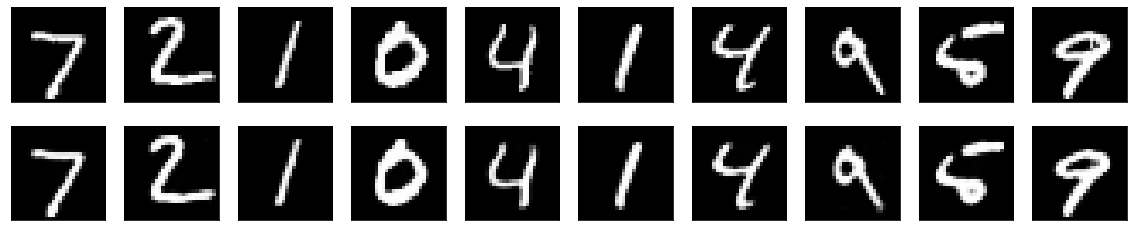

In [27]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()